# Brownian motion
## Exercise 1

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import math
import random
import pylab
from itertools import combinations

In [2]:
class Particle():
    def __init__(self, velocity,DT,DR):
        self.velocity = velocity
        self.x = [random.randint(-20,20)]
        self.y = [random.randint(-20,20)]
        self.phi = [random.uniform(-3.14,3.14)]
        self.DT = DT
        self.DR = DR
        self.MSD = []
        
    def motion(self, time_step):
        Wx, Wy, Wphi = list(np.random.normal(0,1, size = 3))
        
        dxdt= self.velocity*math.cos(self.phi[-1]) + math.sqrt(2*self.DT)* Wx
        dydt= self.velocity*math.sin(self.phi[-1]) + math.sqrt(2*self.DT)* Wy
        dphidt = math.sqrt(2*self.DR)* Wphi
        
        self.x.append(self.x[-1] + dxdt*time_step)
        self.y.append(self.y[-1] + dydt*time_step)
        self.phi.append(self.phi[-1] + dphidt*time_step)
        
        return self.x, self.y, self.phi
    
    def mean_square_displacement(self):

        MSD_new = (self.x[-1] - self.x[0])**2 + (self.y[-1] - self.y[0])**2
        self.MSD.append(MSD_new)
        
        return self.MSD

In [3]:
# Calculate the diffusion constants according to the article, w
eta = 0.001
pi = math.pi
R = 3*1e-6 
T = 300
kB = 1.38e-23; # Boltzmann constant [J/K]
gamma = 6*pi*R*eta; # friction coefficient [Ns/m]
DT = kB*T/gamma; # translational diffusion coefficient [m^2/s]
DR = 6*DT/(8*R**2);

print('DT')
print(DT*1e12) # translational diffusion coefficient [micro m^2/s]
print('DR')
print(DR)

DT
0.07321127382227187
DR
0.0061009394851893215


In [ ]:
# Iterative plot over the brownian movement
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
plt.ion()

fig.show()
fig.canvas.draw()
time = 50 #seconds
time_step = 0.1 # seconds
iterations = int(time/time_step)
n_particles = 4
velocities = [0, 1, 2, 3]
DT = 4
DR = 4
colors = ['r','gold','g','b']

objects = []
for p in range(n_particles):
    objects.append(Particle(velocities[p],DT, DR))   

for i in range(iterations):
    MSD = []
    positions = []
    for p in range(n_particles):
        positions.append(objects[p].motion(time_step))
        MSD.append(objects[p].mean_square_displacement())

    
    ax1.set_ylim(-100, 100) 
    ax1.set_xlim(-100, 100) 
    ax1.clear()
    for p in range(n_particles):
        
        ax1.plot(positions[p][0],positions[p][1], c=colors[p], label=f'Velocity={velocities[p]}' )
        ax1.scatter(positions[p][0][-1],positions[p][1][-1], c=colors[p])
    fig.canvas.draw()
    ax1.set_xlabel('x [\u03BC m ]')
    ax1.set_ylabel('y [\u03BC m ]')
    ax1.set_title('Brownian motion')
    ax1.legend()
    

In [5]:
# Just a plot over the motion of four particles and MSD average over a number of iterations.
n_repeats =400
n_particles = 4
velocities = [0, 1, 2, 3]
DT = 1
DR = 1
colors = ['r','gold','g','b']
time = 50 #seconds
time_step = 0.1 # seconds
iterations = int(time/time_step)
time_vector = np.linspace(0,time,iterations)
MSD_all = []
MSD_sum = []
positions = []
for i in range(n_particles):
    MSD_sum.append([0]*iterations)
    MSD_all.append([0]*iterations)

for i in range(n_repeats):
    objects = []
    for p in range(n_particles):
        objects.append(Particle(velocities[p], DT,DR))   
        
        for i in range(iterations):
            objects[p].motion(time_step)
            MSD_all[p]= objects[p].mean_square_displacement()
        MSD_sum[p] = np.add(MSD_all[p], MSD_sum[p])
MSD_average = np.array(MSD_sum) / n_repeats

for p in range(n_particles):
    positions.append(objects[p].motion(time_step))
       
# Making the plot
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.clear()
#ax1.set_ylim(-50, 50) 
#ax1.set_xlim(-50, 50) 

ax1.set_xlabel('x [\u03BC m ]')
ax1.set_ylabel('y [\u03BC m ]')
ax1.set_title(f'Brownian motion: \n DR={DR} [rad^2/s], DT={DT} [\u03BC m^2/s] \n time={time} s ' )

ax2.set_xlabel('log(t) [\u03BC m ]')
ax2.set_ylabel('log(MSD)')
ax2.set_title('Mean square displacement')

for p in range(n_particles):
    ax1.plot(positions[p][0], positions[p][1], c=colors[p], label=f'Velocity={velocities[p]}' )
    ax1.scatter(positions[p][0][-1], positions[p][1][-1],c=colors[p])
    ax2.plot(np.log(time_vector), np.log(MSD_average[p]), c=colors[p] )
ax1.legend()
ax1.legend()

<IPython.core.display.Javascript object>

/Users/emmarydholm/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log


# Exercise 2

In [6]:
class ActiveParticles():
    def __init__(self, velocity,DT,DR):
        self.velocity = velocity
        self.x = [random.randint(-15,15)]
        self.y = [random.randint(-15,15)]
        self.theta = [random.uniform(-3.14,3.14)]
       
        self.DT = DT
        self.DR = DR
        
    def motion(self, torque,time_step):
        Wx, Wy, Wt = list(np.random.normal(0,1, size = 3))
        
        dxdt= self.velocity*math.cos(self.theta[-1]) + math.sqrt(2*self.DT)* Wx
        dydt= self.velocity*math.sin(self.theta[-1]) + math.sqrt(2*self.DT)* Wy
        dtheta = math.sqrt(2*self.DR)* Wt
        
        self.x.append(self.x[-1] + dxdt*time_step)
        self.y.append(self.y[-1] + dydt*time_step)
        self.theta.append(self.theta[-1] + torque + dtheta*time_step)
        
        return self.x, self.y
    
    def velocity_unit_vector(self):
        velocity_unit_vector = []
        velocity_unit_vector.append(self.x[-1])
        velocity_unit_vector.append(self.y[-1])
        velocity_unit_vector.append(0)
        velocity_unit_vector = velocity_unit_vector / np.linalg.norm(velocity_unit_vector, ord=2)

        return velocity_unit_vector
    
    def torque(self, distances, velocity_unit_vector, distance_unit_vector, n_particles):
        numerator = np.dot(velocity_unit_vector,distance_unit_vector)
        denominator = distance**2
        cross_product = np.cross(velocity_unit_vector,distance_unit_vector)
        
        torque = 0.5*(numerator/denominator) * cross_product
        
        return torque[2]

    def update_positions(self, direction):
        if direction == 'positive':
            self.x[-1] += 1
        elif direction == 'negative':
            self.x[-1] -= 1

In [7]:
def positions_to_change(distances):
    short_distances = np.where(np.where(distances < 1)[0] != np.where(distances < 1)[1])
    vector = []
    for i in short_distances[0]:
        vector.append([np.where(distances < 1)[0][i], np.where(distances < 1)[1][i]])
    
    if len(vector) > 0:
        overlapping_particles = np.sort(vector)  
        overlapping_particles = np.unique(overlapping_particles, axis=0)
    
    if len(vector) > 0:
        positions_to_change_left = []
        positions_to_change_right = []
        for i in range(len(overlapping_particles)):
            p1=objects[overlapping_particles[i][0]].x[-1]
            p2=objects[overlapping_particles[i][1]].x[-1]
            if p1<p2:
                positions_to_change_left.append(overlapping_particles[i][0])
                positions_to_change_right.append(overlapping_particles[i][1])
            else:
                positions_to_change_left.append(overlapping_particles[i][1])
                positions_to_change_right.append(overlapping_particles[i][0])
    
        return positions_to_change_left, positions_to_change_right
    else:
        return 0
    

<IPython.core.display.Javascript object>


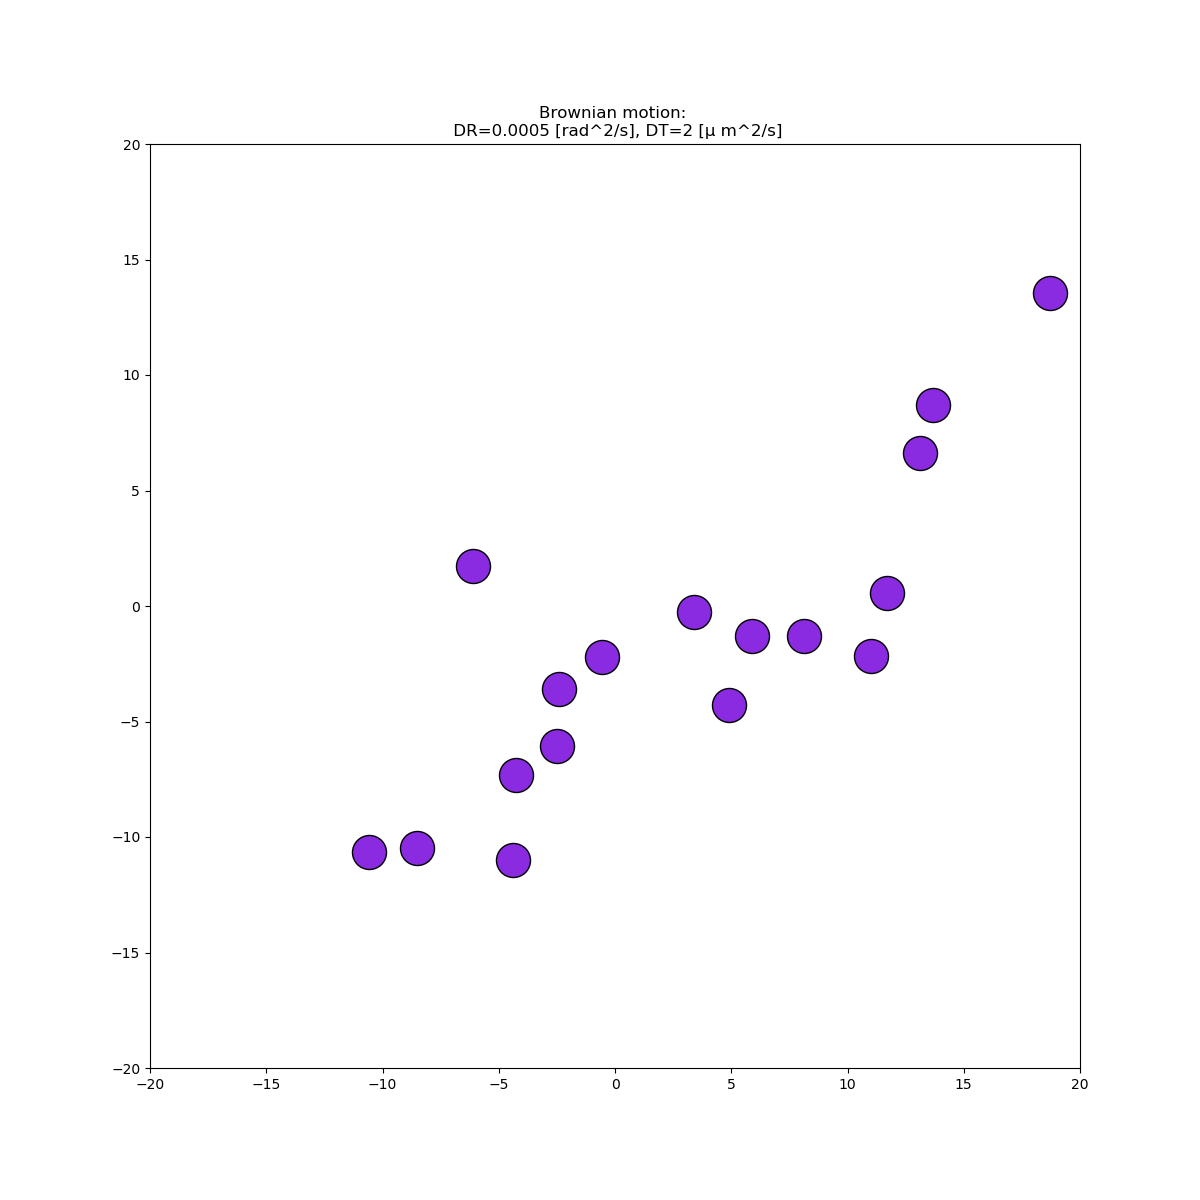

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()
time = 50 #seconds
time_step = 0.05 # seconds
iterations = int(time/time_step)
n_particles = 20
velocity = 10
DT = 2
DR = 0.0005

objects = []

torque = np.zeros(n_particles)

for p in range(n_particles):
    objects.append(ActiveParticles(velocity, DT,DR))

for i in range(iterations):
    velocity_unit_vector = []
    distances = np.zeros((n_particles,n_particles))
    distance_unit_vector = []
    for p in range(n_particles):    
        objects[p].motion(torque[p], time_step)
        velocity_unit_vector.insert(p, objects[p].velocity_unit_vector())

    for t in range(n_particles):
        distance_unit_vector.append([])

        for v in range(n_particles):
            distance_unit_vector[t].append([objects[t].x[-1] - objects[v].x[-1], objects[t].y[-1] - objects[v].y[-1], 0])

    # Calculate distance matrix
    for i in range(n_particles):
        for j in range(n_particles):
            distances[i][j] = math.sqrt((objects[i].x[-1] - objects[j].x[-1])**2 + (objects[i].y[-1] - objects[j].y[-1])**2)

    #Calculate torque
    torque = []
    for p in range(n_particles): 
        t_sum = 0
        for j in range(n_particles):
            if j !=p:

                velocity_unit = velocity_unit_vector[p]
                distance = distances[p][j]
                distance_unit = distance_unit_vector[p][j]
                t_sum += objects[p].torque(distance, velocity_unit, distance_unit, n_particles)

        torque.append(t_sum)
        
    #Move particles that are overlapping    
    overlapping_particles = positions_to_change(distances)
    if overlapping_particles != 0:
        for i in overlapping_particles[0]:
            objects[i].update_positions('negative')
        for i in overlapping_particles[1]:
            objects[i].update_positions('positive')

    # plott
    ax.clear()
    ax.set_ylim(-20, 20) 
    ax.set_xlim(-20, 20) 
    for p in range(n_particles):
        ax.scatter(objects[p].x[-1], objects[p].y[-1],s=600, facecolors='blueviolet', edgecolors='black')
        #ax.plot(objects[p].x, objects[p].y)#,s=600)#, facecolors='blueviolet', edgecolors='black')
    
    ax.set_title(f'Brownian motion: \n DR={DR} [rad^2/s], DT={DT} [\u03BC m^2/s]')
    fig.canvas.draw()
    